# Classification des niveaux d'obésité selon plusieurs caractèristiques

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans
import scikitplot as skplt

Les données proviennent de personnes de Mexico, Peru et colombie.
Elles sont basées sur leurs habitudes alimentaires et leurs conditions physique.
Le dataset contient 17 colonnes (attributs) et 2111 lignes.
77% des données ont été générées synthétiquement et 23% ont été collectées directement des personnes a travers une plateforme web.

## Chargement des données

In [6]:
obesity_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

##### CALC : Habitude de consommation d'alcool. Peut inclure des catégories telles que 
##### FAVC (Frequent consumption of high caloric food): Consommation fréquente d'aliments riches en calories.
##### FCVC (Frequency of consumption of vegetables): Fréquence de consommation de légumes.
##### NCP (Number of main meals): Nombre de repas principaux consommés par jour (par exemple, 1, 2, 3).
##### SCC (Caloric sweets consumption):Consommation de sucreries caloriques.
##### FAF (Physical activity frequency): Fréquence hebdomadaire de l'activité physique.
##### TUE (Time using technology): Temps quotidien passé à utiliser des technologies (ordinateur, téléphone, télévision), en heures.
##### CAEC (Consumption of food between meals):Habitude de consommer des encas entre les repas.
##### MTRANS (Transportation used): Moyen de transport principal utilisé par l'individu :
##### NObeyesdad (Obesity level): Niveau d'obésité de l'individu (cible de classification). Cela inclut plusieurs catégories d'obésité
Insufficient_Weight : Poids insuffisant.
Normal_Weight : Poids normal.
Overweight_Level_I : Surpoids niveau I.
Overweight_Level_II : Surpoids niveau II.
Obesity_Type_I : Obésité de type I.
Obesity_Type_II : Obésité de type II.
Obesity_Type_III : Obésité de type III.


In [7]:
obesity_data.head

<bound method NDFrame.head of             Age  Gender    Height      Weight        CALC FAVC  FCVC  NCP  \
0     21.000000  Female  1.620000   64.000000          no   no   2.0  3.0   
1     21.000000  Female  1.520000   56.000000   Sometimes   no   3.0  3.0   
2     23.000000    Male  1.800000   77.000000  Frequently   no   2.0  3.0   
3     27.000000    Male  1.800000   87.000000  Frequently   no   3.0  3.0   
4     22.000000    Male  1.780000   89.800000   Sometimes   no   2.0  1.0   
...         ...     ...       ...         ...         ...  ...   ...  ...   
2106  20.976842  Female  1.710730  131.408528   Sometimes  yes   3.0  3.0   
2107  21.982942  Female  1.748584  133.742943   Sometimes  yes   3.0  3.0   
2108  22.524036  Female  1.752206  133.689352   Sometimes  yes   3.0  3.0   
2109  24.361936  Female  1.739450  133.346641   Sometimes  yes   3.0  3.0   
2110  23.664709  Female  1.738836  133.472641   Sometimes  yes   3.0  3.0   

      SCC SMOKE      CH2O family_history_with

In [8]:
obesity_data.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Le dataset est composé 2111 lignes et 17 colonnes

In [9]:
obesity_data.shape

(2111, 17)

## Exploration des données

On remarque qu'il n'y a pas de valeurs nulles

In [99]:
obesity_data.isnull().sum()



Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

## Explore features
Pourquoi compter et visualiser les variables ?
Comprendre la distribution des catégories 
Cela aide à détecter d'éventuels déséquilibres dans les données, ce qui peut influencer la performance des modèles (par exemple, un biais potentiel si un genre est sur-représenté).

Les fonctionnalités de la fonction count_values :

Objectif général de la fonction :
La fonction count_values permet de :

Compter les occurrences de chaque catégorie d'une variable catégorielle.
Afficher un graphique à barres pour visualiser cette distribution.
Annoter chaque barre du graphique avec le nombre d'occurrences correspondantes.


In [ ]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order) #sns.countplot Crée un graphique à barres montrant le nombre d'observations pour chaque catégorie de la variable spécifiée.
    for p in ax.patches: 
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()),  #Ajoute un texte (annotation) directement sur la barre
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show() 

### Gender

. Équilibre des données
Les données contiennent légèrement plus d'hommes que de femmes, mais la différence est minime.
Cela signifie que la variable Genre ne présente pas de déséquilibre significatif, ce qui est essentiel pour garantir que les modèles de classification ne favorisent pas un genre au détriment de l'autre.
. Pourquoi l'équilibre est important ?
Lorsqu'une variable catégorique (comme Genre) est fortement déséquilibrée, les modèles de machine learning peuvent :
Biaiser leurs prédictions en faveur de la classe majoritaire.
Avoir des performances optimales sur la classe majoritaire, mais faibles sur la minoritaire.

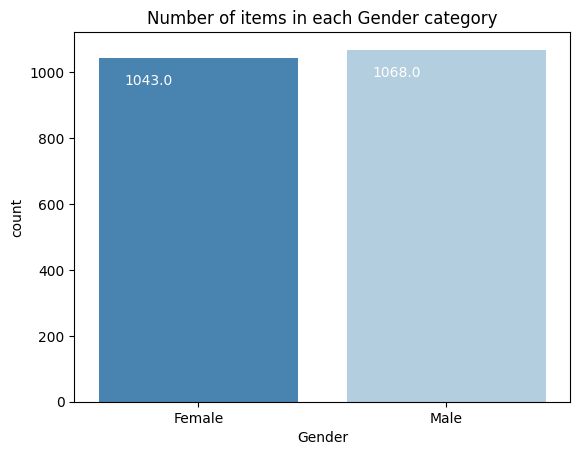

In [12]:
count_values(obesity_data, "Gender")

### Age

Analyse des variables continues comme age et poids 
On affiche aussi leur moyenne et mediane

Si la moyenne et la médiane sont proches : la distribution est probablement symétrique.
Si elles sont éloignées : la distribution est asymétrique ou biaisée .


In [ ]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean") #Ajouter une ligne verticale pour la moyenne
    plt.axvline(dataset[feature].median(), color = "orange", label = "median") #Ajouter une ligne verticale pour la mediane
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [14]:
obesity_data["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [15]:
obesity_data["Age"].median()

22.77789

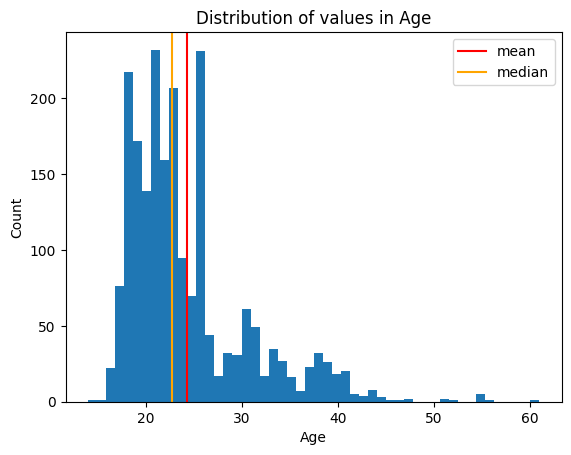

In [17]:
plot_distribution(obesity_data, "Age")

La personne la plus jeune du dataset a 14 ans, et la plus âgée en a 61.  l'histogramme est **asymétrique**, avec une moyenne de **24,31** et une médiane de **22,78**.

### Height

La majorité des personnes mesurent entre 1,60 m et 1,85 m. La moyenne et la médiane se situent toutes deux autour de 1,70 m.

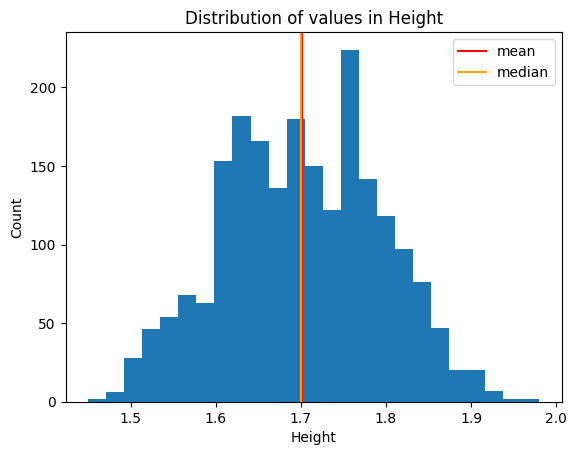

In [18]:
plot_distribution(obesity_data, "Height") 

### Weight

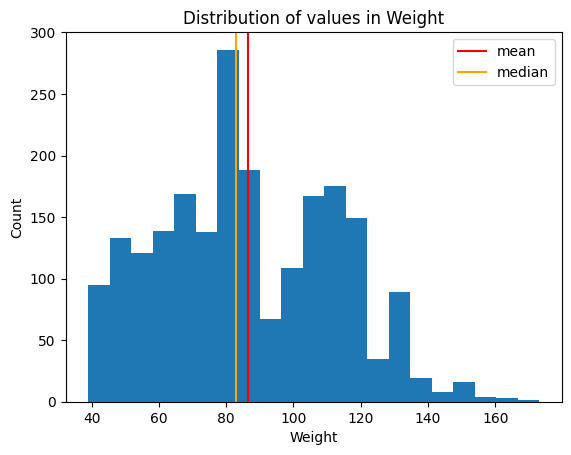

In [102]:
plot_distribution(obesity_data, "Weight") 

L'obésité est déterminée en calculant l'indice de masse corporelle (IMC), qui est une fonction de la taille et du poids d'une personne. La formule exacte est la suivante :
$Body mass index = \frac{Weight}{Height * Height}$
 Ainsi, la taille est un élément important pour déterminer l'obésité.

Examiner la corrélation :
Si les points suivent une tendance linéaire marquée, cela indique une corrélation forte.
La pente m indique si la relation est positive (poids augmente avec la taille) ou négative (poids diminue avec la taille).
 

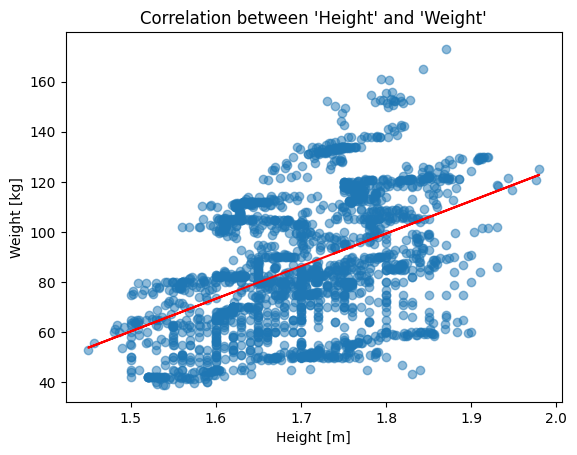

In [21]:
plt.scatter(obesity_data["Height"], obesity_data["Weight"], alpha = 0.5)
m, b = np.polyfit(obesity_data["Height"], obesity_data["Weight"], 1)
plt.plot(obesity_data["Height"], m * obesity_data["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

La ligne de code ci-dessous trace le poids et la taille de chaque individu. La ligne rouge indique qu'il existe une corrélation positive entre ces deux variables, ce qui signifie qu'une augmentation de l'une entraîne une augmentation de l'autre. En d'autres termes, les personnes plus grandes ont tendance à peser davantage.

In [ ]:
r = np.corrcoef(obesity_data["Height"], obesity_data["Weight"])[0, 1]
print(f"Coefficient de corrélation: {r}")
""" Corrélation positive :
r>0 : Lorsque x augmente, y a tendance à augmenter.
Plus r est proche de +1, plus la relation est forte.
 Corrélation négative :
r<0 : Lorsque x augmente, y a tendance à diminuer.
Plus r est proche de -1, plus la relation est forte.
Aucune corrélation :
r≈0r \approx 0r≈0 : Pas de relation linéaire identifiable.
"""

Coefficient de corrélation: 0.46313611661562687


### On veut vérifier ici si l'obesité est hereditaire 


Les participants à l'enquête devaient dire si des membres de leur famille souffraient de surpoids. La majorité d'entre eux ont répondu que oui.

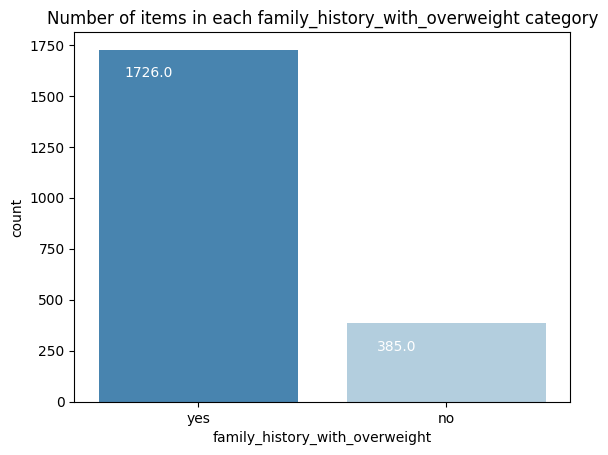

In [20]:
count_values(obesity_data, "family_history_with_overweight")

### Consommation de high caloric food

Les participants à l'enquête devaient indiquer s'ils consommaient fréquemment des aliments riches en calories. Il n'y avait que deux réponses possibles : « oui » ou « non ». La majorité d'entre eux  ont admis consommer des aliments riches en calories.

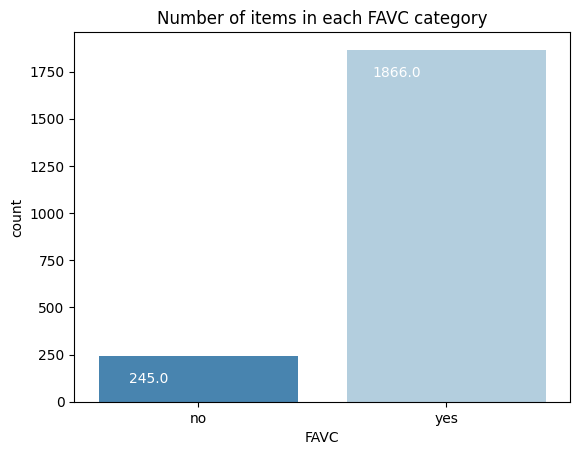

In [23]:
count_values(obesity_data, "FAVC") 

### Grignoter entre les repas

Les participants devaient indiquer s'ils grignotent entre les repas et, le cas échéant, à quelle fréquence. Ils pouvaient répondre soit « Non » (s'ils ne mangent pas en dehors des heures de repas), soit « Parfois », « Fréquemment » ou « Toujours ». Les données montrent que la majorité des personnes grignotent **parfois** entre les repas.

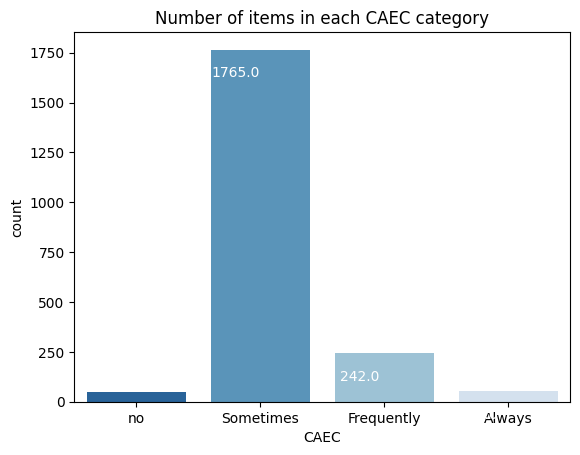

In [26]:
count_values(obesity_data, "CAEC", ["no", "Sometimes", "Frequently", "Always"]) 

### Smoke

La majorité des participants à l'enquête ne fument pas.

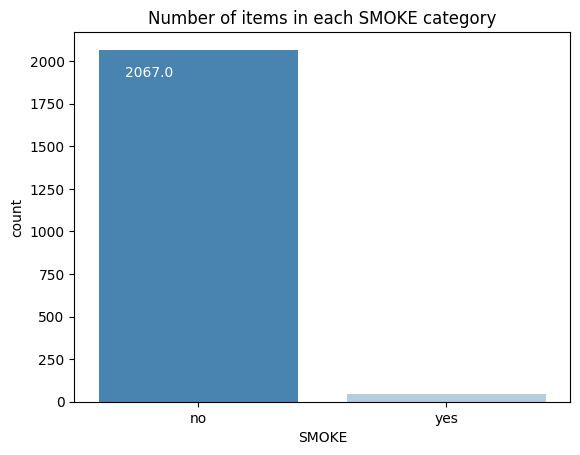

In [27]:
count_values(obesity_data, "SMOKE")

### Boire de l'alcool

Cela indique qu'une grande proportion des participants consomme de l'alcool occasionnellement, mais que la fréquence de cette consommation est généralement faible dans l'ensemble.

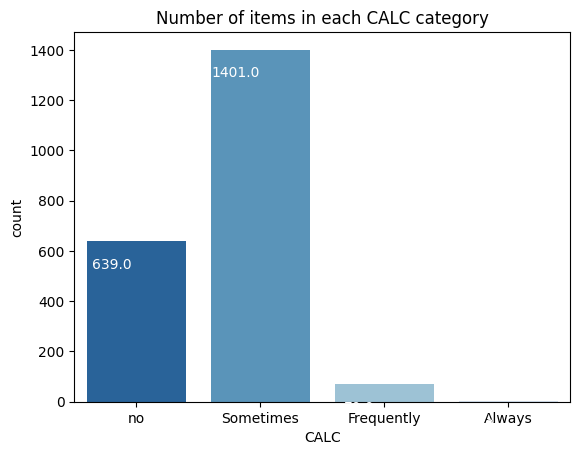

In [56]:
count_values(obesity_data, "CALC")

### Transport 

La majorité des personnes  dépendent des transports en commun. Beaucoup moins de répondants utilisent leur voiture. Le reste utilise soit un moyen de transport personnel, soit un vélo ou une moto.

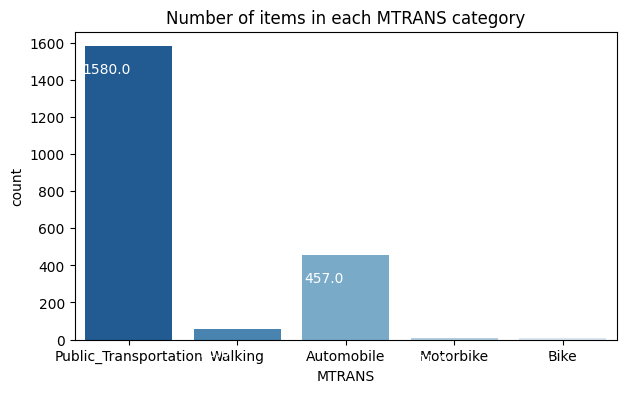

In [57]:
plt.figure(figsize = (7, 4))
count_values(obesity_data, "MTRANS")

### Normal, overweight , obese
**Underweight** if BMI < 18.5
**Normal** if BMI 18.5 - 24.9
**Overweight** if BMI 25.0 - 29.9
**Obesity I** if BMI 30.0 - 34.9
**Obesity II** if BMI 35.0 to 39.9
**Obesity III** if BMI > 40

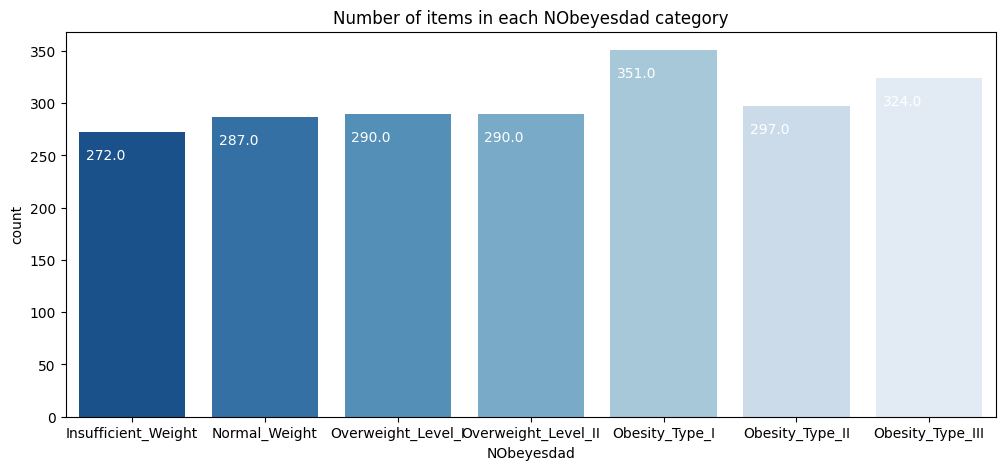

In [58]:
plt.figure(figsize = (12, 5))
count_values(obesity_data, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Le graphique montre que l'ensemble de données est équilibré ; seule la classe **"Obesity Type I"** dépasse légèrement les autres catégories en nombre.

### Overweight and Gender

Cette fonction cross_plot génère un graphique pour visualiser l'interaction entre deux variables catégorielles. Elle prend en entrée un dataset, une catégorie principale (lead_category) et une catégorie secondaire (sup_category), ainsi qu'un paramètre optionnel order qui définit l'ordre d'apparition des catégories sur l'axe des x. Le graphique montre la distribution des valeurs de la catégorie principale, avec des barres colorées en fonction des différentes valeurs de la catégorie secondaire.

In [59]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    
    plt.show() 

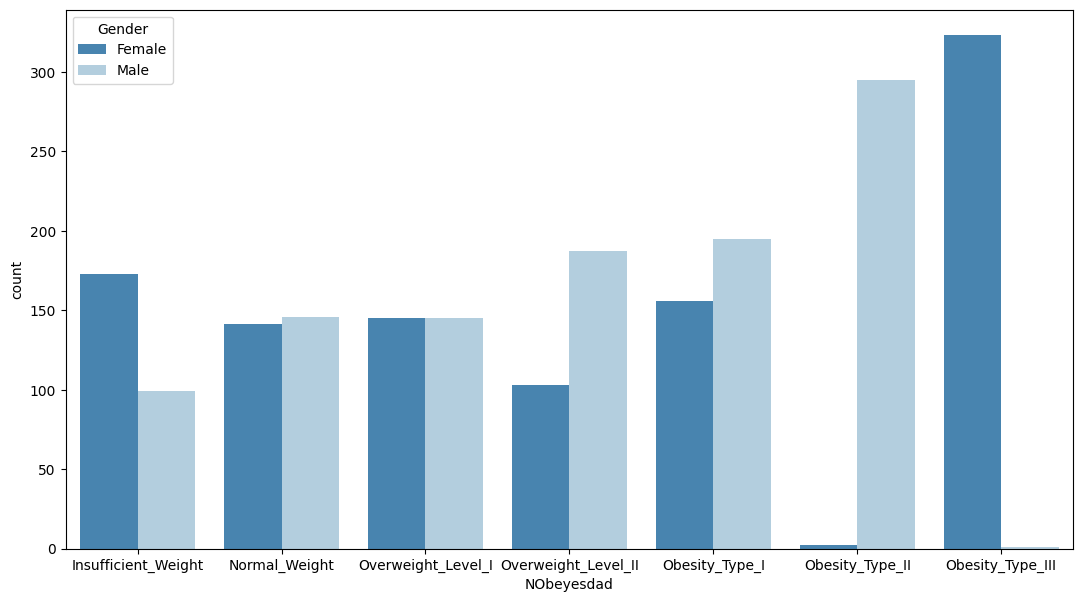

In [64]:
plt.figure(figsize = (13, 7))
cross_plot(obesity_data, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

Les femmes sont plus susceptibles d'avoir un **"poids insuffisant"** que les hommes. En revanche, il y a plus d'hommes obèses que de femmes, à l'exception de la dernière catégorie, celle de l'obésité extrême.

### Overweight and alcohol

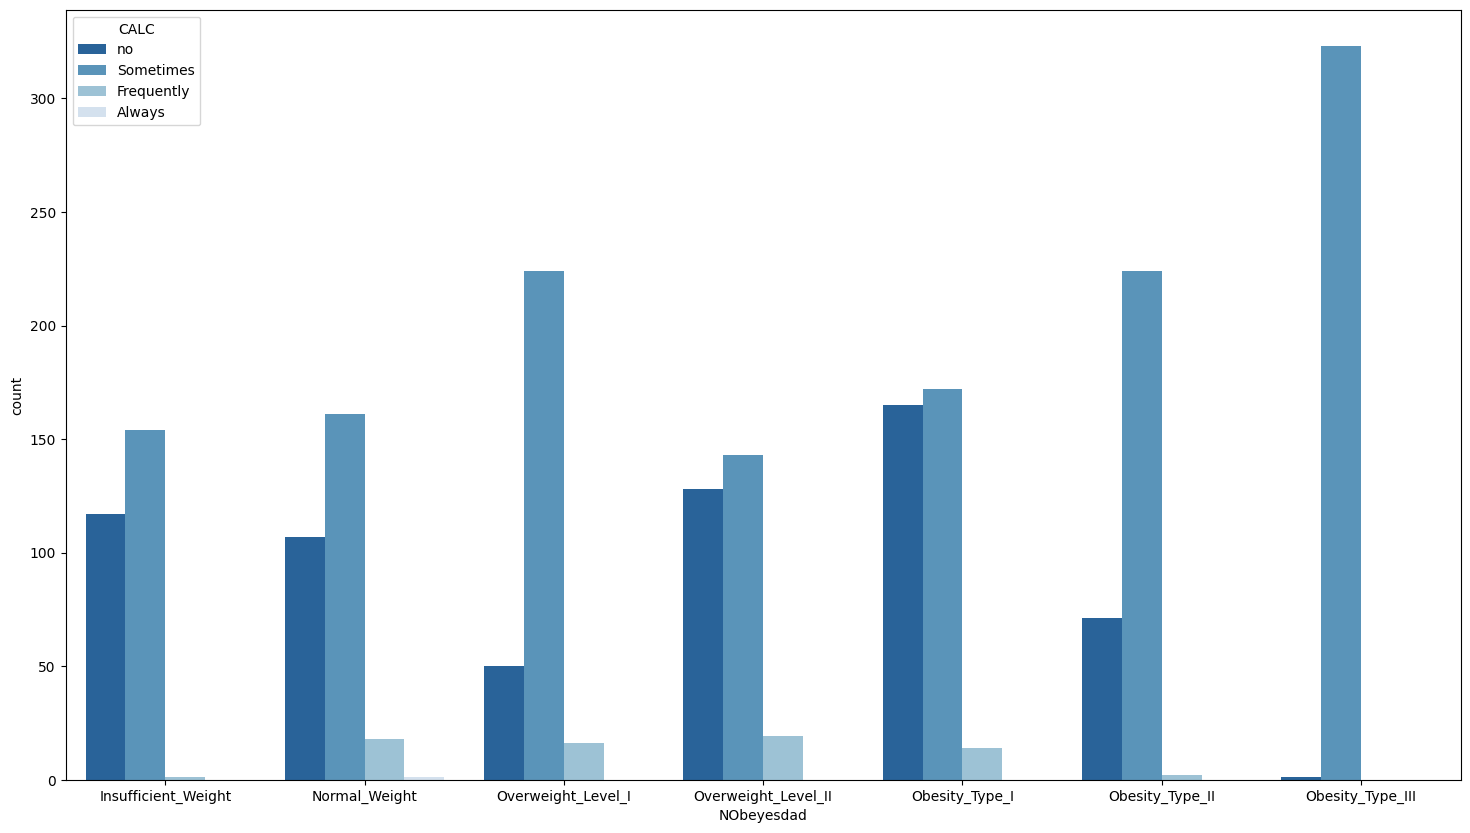

In [67]:
plt.figure(figsize = (18, 10))
cross_plot(obesity_data, "NObeyesdad", "CALC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 


Il pourrait exister un faible lien entre l'alcool et l'obésité. Les données suggèrent que les personnes qui boivent de l'alcool "parfois" pourraient être confrontées à des problèmes de poids.

### Overweight and food between meals

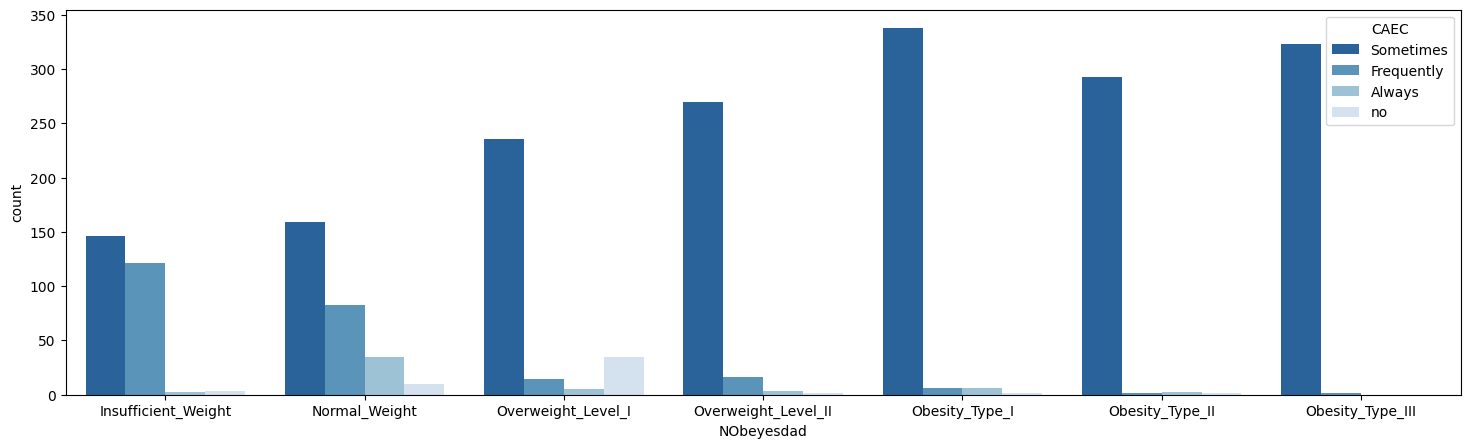

In [68]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Le poids des personnes qui "fréquemment" ou "toujours" prennent des encas entre les repas ne semble pas anormal. Seules les personnes qui grignotent de temps en temps semblent appartenir aux catégories "Surpoids" ou "Obésité".

### Overweight and transport

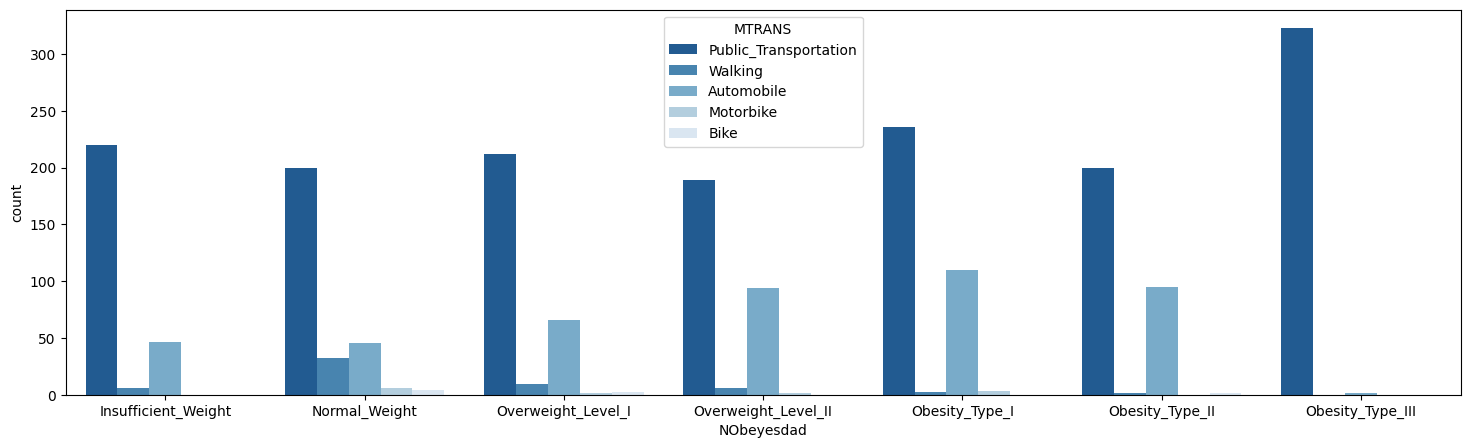

In [101]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Le mode de transport semble ne pas affecter de manière significative le poids d'une personne. Les personnes de poids normal et en surpoids utilisent toutes les transports en commun, et tous les groupes dépendent également des voitures.

## Statistics 

In [72]:
obesity_data.describe().T #obtient un résumé statistique des colonnes de obesity_data (val numériques par defaut)

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [29]:
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

In [115]:
obesity_data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Data Pre-processing

### Encoding features

Le One-Hot Encoding est une technique utilisée pour convertir des variables catégorielles  en variables numériques afin qu'elles puissent être utilisées dans les modèles d'apprentissage automatique.
Pour une variable avec plusieurs catégories (par exemple Gender avec "Homme" et "Femme"), une nouvelle colonne est créée pour chaque catégorie.

les labels sont stockés dans une obesity_label

In [111]:
#One hot encoding
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])
obesity_lab = obesity_data[["NObeyesdad"]]
obesity_dummies.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,True,False,False,True,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,True,False,False,True,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
2,False,True,False,True,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,False,True,True,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,False,True,True,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


Les trois ensembles — les caractéristiques numériques, les caractéristiques encodées en one-hot, et les étiquettes — sont concaténés dans un nouveau DataFrame. Ce dernier contient maintenant 32 colonnes. Les premières lignes de ce DataFrame sont affichées ci-dessous.

In [106]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)

In [107]:
obesity_concatenated.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,True,False,...,False,False,False,True,False,False,False,True,False,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,True,False,...,False,False,True,False,False,False,False,True,False,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,True,...,False,True,False,False,False,False,False,True,False,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,True,...,False,True,False,False,False,False,False,False,True,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,False,True,...,False,False,True,False,False,False,False,True,False,Overweight_Level_II


### Separate Features and labels

Les caractéristiques (features) et les étiquettes (labels) ont été séparées et sont stockées dans des variables distinctes. 

In [35]:
obesity_label = obesity_concatenated["NObeyesdad"]
obesity_features = obesity_concatenated.drop("NObeyesdad", axis = 1)

In [36]:
obesity_label 

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [37]:
obesity_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   bool   
 9   Gender_Male                         2111 non-null   bool   
 10  family_history_with_overweight_no   2111 non-null   bool   
 11  family_history_with_overweight_yes  2111 no

In [38]:
obesity_features = obesity_features.astype("float") 

In [39]:
obesity_features.dtypes 

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

## Scale Features

Les valeurs de toutes les caractéristiques doivent être dans la même plage. Sinon, l'algorithme pourrait mal les interpréter et leur attribuer des coefficients (poids) incorrects. Les caractéristiques liées à l'obésité sont mises à l'échelle avec MinMaxScaler(), ce qui place toutes les valeurs entre 0 et 1. La deuxième ligne confirme que la mise à l'échelle a été réussie.

In [40]:
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)

In [41]:
obesity_features_scaled.min(axis = 1), obesity_features_scaled.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

Si une caractéristique a une plage de valeurs beaucoup plus large que les autres (par exemple, une caractéristique qui varie de 0 à 1000, alors qu'une autre varie de 0 à 1), elle pourrait dominer les autres caractéristiques lors de l'entraînement du modèle. L'algorithme pourrait ainsi accorder des coefficients (poids) disproportionnés à cette caractéristique et négliger les autres, ce qui fausse les prédictions du modèle.

## Encode Labels 

La plupart des algorithmes de classification en machine learning attendent des étiquettes sous forme de valeurs numériques (et non de chaînes de caractères). C'est pourquoi la classe d'obésité est encodée avec LabelEncoder(). Ce dernier remplace chaque classe par un entier.

In [ ]:
encoder = LabelEncoder() 
"""Instanciation de l'encodeur : LabelEncoder() est un outil de scikit-learn qui permet de transformer les étiquettes
 de classes en valeurs numériques. Il est d'abord instancié, ce qui crée l'objet de l'encodeur.

"""

In [ ]:
encoder.fit(obesity_label)
""" Aperçu des données : Ensuite, l'encodeur "appréhende" les 
données. Cela signifie qu'il analyse les classes uniques présentes dans la variable cible (la classe d'obésité, dans ce cas) 
pour déterminer combien de 
valeurs distinctes il y a et attribuer un entier à chaque classe.

"""

LabelEncoder()

In [ ]:
obesity_labels_encoded = encoder.transform(obesity_label)
"""  La méthode transform() est ensuite utilisée pour encoder les classes. Chaque classe textuelle (par exemple, "Obesity_Type_I", "Obesity_Type_II", etc.) est remplacée par un entier unique. Par exemple, "Obesity_Type_I" pourrait être codé par 0, "Obesity_Type_II" par 1,
 et ainsi de suite."""

In [116]:
obesity_labels_encoded

array([1, 1, 1, ..., 4, 4, 4])

## Train-Test split

Division des données : La fonction train_test_split est utilisée pour diviser le jeu de données en deux parties : un ensemble d'entraînement (80 % des données) et un ensemble de test (20 % des données). Le paramètre shuffle=True permet de mélanger les données avant de les diviser, ce qui assure que les échantillons sont répartis de manière aléatoire.

In [ ]:
obesity_features_tr, obesity_features_ts, obesity_labels_tr, obesity_labels_ts = train_test_split(
                obesity_features, obesity_labels_encoded, 
                test_size = 0.2, stratify = obesity_labels_encoded,
                random_state = 42) # shuffle=True 

""" stratify = obesity_labels_encoded : Ce paramètre garantit que la répartition des étiquettes dans l'ensemble de test soit similaire à celle 
de l'ensemble d'entraînement. En d'autres termes, il veille à ce que chaque classe d'obésité soit proportionnellement représentée dans les
 deux ensembles, ce qui est particulièrement utile pour les jeux de données déséquilibrés."""

 Après la division, on peut vérifier la taille des ensembles d'entraînement et de test pour s'assurer que la répartition est correcte et que les données sont bien mélangées.

In [51]:
obesity_features_tr.shape, obesity_labels_tr.shape, obesity_features_ts.shape, obesity_labels_ts.shape

((1688, 31), (1688,), (423, 31), (423,))


La fonction Counter permet de compter le nombre d'exemples dans chaque classe du jeu de données. En utilisant Counter, on peut vérifier si les échantillons sont répartis correctement entre les différentes classes dans les ensembles d'entraînement et de test.

In [73]:
Counter(obesity_labels_tr)

Counter({5: 232, 1: 229, 6: 232, 0: 218, 3: 237, 4: 259, 2: 281})

In [74]:
Counter(obesity_labels_ts)

Counter({0: 54, 1: 58, 6: 58, 4: 65, 3: 60, 2: 70, 5: 58})

### Train model to classify data into obesity categories

#### Build model

GridSearchCV
C'est une méthode de recherche systématique des meilleurs hyperparamètres pour un modèle. Elle teste toutes les combinaisons possibles des paramètres spécifiés

In [ ]:
f1 = make_scorer(f1_score, average = "weighted")
"""Cette ligne crée un scorer personnalisé basé sur la métrique F1-score"""

In [ ]:
params = {
    "max_depth": [5, 7, 9, 11, 13, 15]
}
"""max_depth :contrôle la profondeur maximale de l'arbre de décision
Liste [5, 7, 9, 11, 13, 15] :

Ce sont les différentes valeurs que GridSearchCV va tester pour le paramètre max_depth."""


In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 5, scoring = f1)
"""DecisionTreeClassifier() : C'est le modèle de classification basé sur un arbre de décision.
param_grid=params : La grille de recherche contient les différentes valeurs pour max_depth.
scoring=f1 : Utilise le F1-score pondéré pour évaluer la qualité des modèles."""

In [ ]:
grid_search.fit(obesity_features_tr, obesity_labels_tr)
"""fit :
Effectue la recherche d'hyperparamètres.
Pour chaque combinaison de paramètres, il entraîne le modèle sur les données"""

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15]},
             scoring=make_scorer(f1_score, average=weighted))

In [ ]:
grid_search.cv_results_
"""grid_search.cv_results_
Retourne un dictionnaire contenant des détails sur les performances pour chaque combinaison testée. 
"""

{'mean_fit_time': array([0.00856829, 0.01017747, 0.00897512, 0.02094278, 0.0093739 ,
        0.00897532]),
 'std_fit_time': array([2.72350558e-03, 1.59064106e-03, 6.30751094e-04, 1.34104611e-02,
        4.88519936e-04, 7.89305942e-07]),
 'mean_score_time': array([0.00379109, 0.00318608, 0.00219493, 0.00857878, 0.00259418,
        0.00299263]),
 'std_score_time': array([0.00132187, 0.0007401 , 0.00039861, 0.01018188, 0.00079826,
        0.00109206]),
 'param_max_depth': masked_array(data=[5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5},
  {'max_depth': 7},
  {'max_depth': 9},
  {'max_depth': 11},
  {'max_depth': 13},
  {'max_depth': 15}],
 'split0_test_score': array([0.77448113, 0.88169239, 0.90766433, 0.90217343, 0.89894708,
        0.9018394 ]),
 'split1_test_score': array([0.82653393, 0.92093314, 0.92927312, 0.92940777, 0.94116359,
        0.94666359]),
 'split2_test_

In [ ]:
grid_search.best_params_
"""Retourne la meilleure combinaison d'hyperparamètres ayant donné le meilleur score."""

{'max_depth': 13}

#### Train and evaluate model

In [ ]:
model_tree = DecisionTreeClassifier(max_depth = 13)

les fonctions fit, predict et score sont placées dans une fonction, ce qui facilite l'entraînement, l'évaluation du modèle. Dans ce cas particulier, elle affichera uniquement les performances de l'arbre de décision en termes de "précision" (accuracy) et de "score f1" sur les deux ensembles (d'entraînement et de test).

In [ ]:
def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    """
    Function: Trains model, predict classes and computes accuracy and f1 score.
    
    Parameters: estimator, X_train, y_train, X_test, y_test.
    """
    estimator.fit(train_features, train_labels)
    
    print(f"Accuracy on Train data: {accuracy_score(train_labels, estimator.predict(train_features))}")
    print(f"F1 score on Train data: {f1_score(train_labels, estimator.predict(train_features), average = 'weighted')}")
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    print(f"F1 on Test data: {f1_score(test_labels, estimator.predict(test_features), average = 'weighted')}")
    """Accuracy:la proportion de familles ou individus correctement classifiés dans leur catégorie d'obésité (par exemple, "Normal", "Obésité de type I", etc.) parmi toutes les observations du jeu de données.
   Précision (Precision) : proportion des vrais positifs parmi les éléments classifiés comme positifs (ex. ceux qui sont classés comme "obésité de type II" et qui sont réellement de ce type).
Rappel (Recall) : proportion des vrais positifs parmi tous les éléments qui sont réellement positifs (ex. tous ceux qui sont réellement de type "obésité de type II" dans l'ensemble des données). """

Les valeurs de "précision" (accuracy) et de "score f1" sur les données d'entraînement sont de 100 %, mais sur les données de test, elles sont de 91 % à 92 %.

In [83]:
train_predict_score(model_tree, obesity_features_tr, obesity_labels_tr, obesity_features_ts, obesity_labels_ts)

Accuracy on Train data: 1.0
F1 score on Train data: 1.0
Accuracy on Test data: 0.9148936170212766
F1 on Test data: 0.9152724912457364


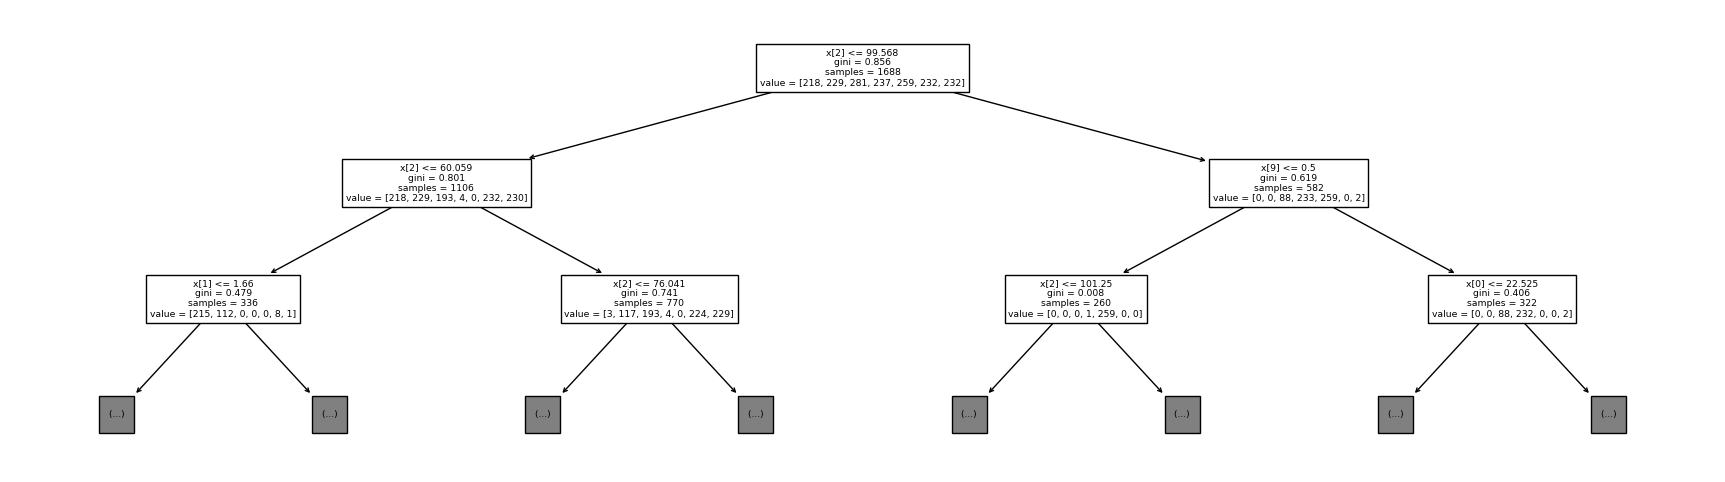

In [ ]:
plt.figure(figsize = (22, 6))
plot_tree(model_tree, max_depth = 2)
plt.show()

Les arbres de décision sont plus faciles à interpréter. Lorsqu'ils sont tracés (voir ci-dessus), ils montrent comment les décisions ont été prises (c'est-à-dire comment la classification a eu lieu). Chaque nœud "pose" une question ; si la réponse est "Vrai", l'information est transmise au nœud enfant à gauche ; si la réponse est "Faux", l'information va au nœud enfant à droite. Ce processus continue jusqu'à ce qu'aucune autre question ne puisse être posée, ou jusqu'à atteindre la limite de "profondeur maximale" (max_depth). Seuls les 2 premiers nœuds sont affichés ci-dessus.

In [85]:
print(classification_report(obesity_labels_ts, model_tree.predict(obesity_features_ts)))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        54
           1       0.80      0.84      0.82        58
           2       0.91      0.96      0.93        70
           3       0.97      0.95      0.96        60
           4       1.00      0.98      0.99        65
           5       0.86      0.86      0.86        58
           6       0.91      0.91      0.91        58

    accuracy                           0.91       423
   macro avg       0.92      0.91      0.91       423
weighted avg       0.92      0.91      0.92       423



La fonction classification_report de scikit-learn affiche le succès de la classification (métriques) pour chaque classe. Par exemple, la plupart des échantillons de la classe "Obesity_Type_III" (classe 4) ont été correctement classés. Le modèle a atteint 100 % de "précision" et 99 % de "f1 score". En revanche, les caractéristiques indiquant "Normal_Weight" (classe 1) ont été mal interprétées et ont obtenu environ 80 % de "précision" et de "f1 score".

In [ ]:
model_tree.classes_

array([0, 1, 2, 3, 4, 5, 6])

#### Matrice de confusion

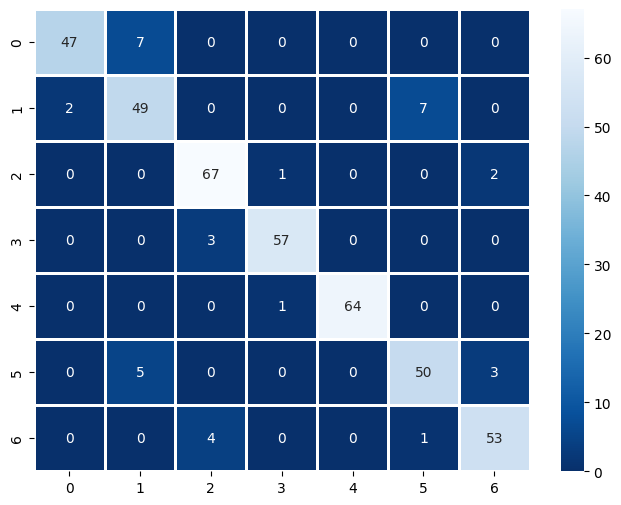

In [87]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(obesity_labels_ts, model_tree.predict(obesity_features_ts)),
           annot = True,
           fmt = ".0f",
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white",
           xticklabels = model_tree.classes_,
           yticklabels = model_tree.classes_)
plt.show()

La fonction confusion_matrix affiche les étiquettes réelles versus les étiquettes prédites. Les lignes représentent les classes réelles, tandis que les colonnes représentent les classes prédites. Par exemple, 47 échantillons ont été correctement classés dans la 0ème classe, mais 7 ont été incorrectement placés dans la 1ère classe. Un seul échantillon de la classe 4 a été mal classé en tant qu'échantillon de la classe 3.

## CLUSTERING


On veut vérifier si les caractéristiques des individus permettent de les classer clairement selon leur type de surpoids ou d'obésité. Pour cela, on utilise l'algorithme KMeans, qui permet de créer des groupes basés sur la similitude des données.

On sait qu'il existe 7 types de poids dans les données, donc on demande à l'algorithme de former 7 groupes. La méthode d'initialisation choisie, K-means++, permet de choisir les points de départ (centroïdes) de manière intelligente, ce qui aide l'algorithme à être plus rapide et efficace.

In [92]:
kmeans = KMeans(n_clusters = 7, init = "k-means++")

seules les caractéristiques les plus importantes (celles contenant le plus d'informations utiles) sont affichées.

Le modèle DecisionTreeClassifier() a déterminé que les colonnes "Height" (Taille) et "Weight" (Poids) sont les plus pertinentes. Elles représentent respectivement 21,9 % et 47,85 % de l'information contenue dans les données. Le résultat montre également que certaines colonnes n'apportaient pas d'informations utiles sur leur lien avec l'obésité et auraient pu être supprimées.








In [93]:
model_tree.feature_importances_

array([0.04184926, 0.22082785, 0.47515547, 0.0135702 , 0.00714488,
       0.00561014, 0.00081335, 0.01124707, 0.00060059, 0.15732823,
       0.0006524 , 0.00232294, 0.02176254, 0.00069194, 0.00134318,
       0.00157633, 0.00760256, 0.        , 0.        , 0.00135428,
       0.        , 0.        , 0.        , 0.        , 0.00062654,
       0.02540261, 0.00251765, 0.        , 0.        , 0.        ,
       0.        ])

In [94]:
def plot_clusters(dataset, feature_one, feature_two, labels, title = None):
    """
    Function: Computes and displays clusters.
    
    Parameters: dataset, 2 features, cluster indicator.
    """
    sns.scatterplot(data = dataset, x = feature_one, y = feature_two, hue = labels, palette = "Blues_r")
    if title is not None:
        plt.title(title)
    plt.show()


Les clusters (formés à partir des caractéristiques "Height" et "Weight") dans les données de test sont tracés ci-dessous en fonction de leurs étiquettes réelles.

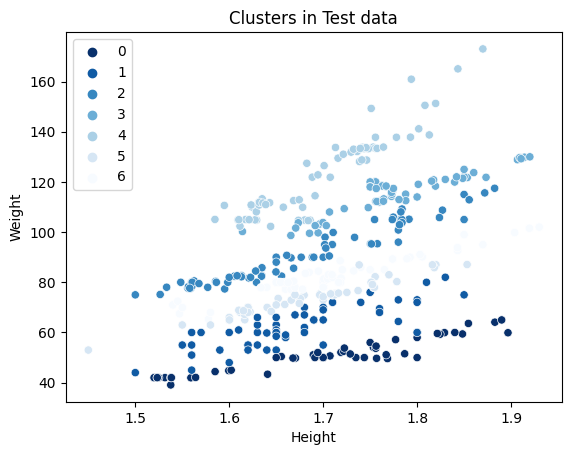

In [95]:
plot_clusters(obesity_features_ts, "Height", "Weight", obesity_labels_ts, "Clusters in Test data")

o	Montre la distribution des individus dans les données de test en fonction des labels réels (les vraies classes d'obésité).
o	Chaque point est coloré selon la classe à laquelle il appartient dans les données d'origine.
o	Cela permet de visualiser comment les individus de différentes catégories (obésité, poids normal, etc.) se distribuent en fonction des deux caractéristiques choisies : Height (taille) et Weight (poids).


KMeans calcule les distances entre chaque point (décrit par des valeurs de caractéristiques) et l'assigne à un cluster. Ainsi, le clustering peut être considéré comme un outil de classification d'apprentissage non supervisé.

kmeans.fit_predict() : cette fonction effectue deux tâches à la fois :
fit() : l'algorithme KMeans s'adapte aux données d'entrée, trouve les centroids et assigne chaque point de données à un cluster.
predict() : après l'adaptation, l'algorithme attribue une étiquette de cluster à chaque point de données. Les résultats (les étiquettes de clusters prédites) sont stockés dans predicted_labels.

In [96]:
predicted_labels = kmeans.fit_predict(obesity_features_ts)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


 KMeans a réussi à regrouper les points basés sur "Height" et "Weight" en 7 catégories, qui correspondent largement aux étiquettes des données de test.

Cette ligne appelle de nouveau la fonction plot_clusters, mais cette fois avec les labels prédits par KMeans (c'est-à-dire les résultats de predicted_labels). Cela affiche les clusters trouvés par KMeans dans le graphique, en utilisant les caractéristiques "Height" et "Weight" des données de test.

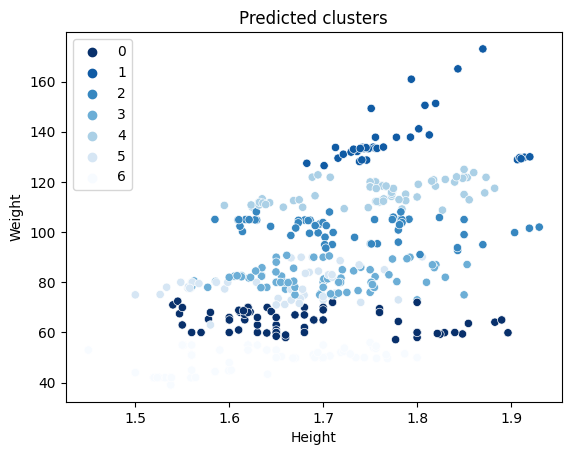

In [97]:
plot_clusters(obesity_features_ts, "Height", "Weight", predicted_labels, "Predicted clusters")

La taille et le poids d'une personne sont les facteurs les plus importants pour déterminer son statut d'obésité. D'autres facteurs peuvent également jouer un rôle, tels que les habitudes alimentaires et l'activité physique. Les caractéristiques du jeu de données peuvent être utilisées à la fois pour des tâches de classification et de clustering, mais il convient de noter que la plupart des échantillons sont générés de manière synthétique, c'est-à-dire qu'ils ne reflètent pas le monde réel. Par conséquent, des conclusions solides nécessitent un ensemble de données beaucoup plus représentatif de groupes plus larges.